# 🖥️ Proyecto de Machine Learning para tienda Aurelion (Grupo # 6)

Proyecto de práctica para el bootcamp de fundamentos de Inteligencia Artificial impartido por GUAYERD

💡**Recomendación:**

Clonar directamente repositorio mediante `git clone https://github.com/jperez-xcvi/guayerd_ia` si se desea navegar entre ramas y explorar a detalle el avance del proyecto y las versiones de `aurelion.ipynb` de la manera más adecuada

📝**Notas de versión:**

1. En `2ndsprint` se encuentra la versión con el procesamiento de los dataset originalmente separados y teniendo en cuenta requisitos de entrega de segundo sprint (Ver `Documentacion.md` o `Documentacion.pdf`)
3. En `3rdsprint` se encuentra la aplicación de algoritmos de ML aplicables al caso utilizando el dataset unificado como resultado del sprint 2

## 1. Importación de Librerías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime

## 2. Lectura de datos</h2>

In [2]:
current_dir = os.getcwd()
print("Current Directory:", current_dir)

Current Directory: c:\PROYECTOS\guayerd_ia


In [3]:
# Configuración de rutas base
data_location = "data"
data_path = os.path.join(current_dir, data_location)

# nombre de los archivos
file = "aurelion.csv"


# lectura del archivo
df_aurelion = pd.read_csv(os.path.join(data_path, file)) #dataframe clientes


## 3. Análisis Exploratorio de Datos (EDA)

### 3.1 Tamaño de la muestra

In [4]:
#Forma del dataset
df_aurelion.shape

(343, 11)

Tenemos un dataset de 11 columnas y 343 registros

### 3.2 Visualización preliminar de los datos

In [5]:
#Visualización del dataframe
df_aurelion.head()

,fecha_venta,nombre_cliente,email_cliente,ciudad,fecha_alta,producto_comprado,categoria,cantidad,precio_unitario,importe,medio_pago
0,2024-06-19,Guadalupe Romero,guadalupe.romero@mail.com,Carlos Paz,2023-03-03,Toallas Húmedas x50,Limpieza,1,2902,2902,tarjeta
1,2024-03-17,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2023-02-18,Aceitunas Negras 200g,Alimentos,5,2394,11970,qr
2,2024-03-17,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2023-02-18,Helado Vainilla 1L,Alimentos,5,469,2345,qr
3,2024-03-17,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2023-02-18,Fernet 750ml,Licores,2,4061,8122,qr
4,2024-03-17,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2023-02-18,Medialunas de Manteca,Alimentos,1,2069,2069,qr


### 3.3 Verificación y rectificación de validez de los datos (formatos o tipos)

In [6]:
#Verificación de tipos de datos
df_aurelion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   fecha_venta        343 non-null    object
 1   nombre_cliente     343 non-null    object
 2   email_cliente      343 non-null    object
 3   ciudad             343 non-null    object
 4   fecha_alta         343 non-null    object
 5   producto_comprado  343 non-null    object
 6   categoria          343 non-null    object
 7   cantidad           343 non-null    int64 
 8   precio_unitario    343 non-null    int64 
 9   importe            343 non-null    int64 
 10  medio_pago         343 non-null    object
dtypes: int64(3), object(8)
memory usage: 29.6+ KB


In [7]:
#Formateo de datos
df_aurelion['fecha_venta'] = pd.to_datetime(df_aurelion['fecha_venta'], format='%Y-%m-%d')
df_aurelion['fecha_alta'] = pd.to_datetime(df_aurelion['fecha_alta'], format='%Y-%m-%d')

In [8]:
# Reverificación de tipos de datos
df_aurelion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   fecha_venta        343 non-null    datetime64[ns]
 1   nombre_cliente     343 non-null    object        
 2   email_cliente      343 non-null    object        
 3   ciudad             343 non-null    object        
 4   fecha_alta         343 non-null    datetime64[ns]
 5   producto_comprado  343 non-null    object        
 6   categoria          343 non-null    object        
 7   cantidad           343 non-null    int64         
 8   precio_unitario    343 non-null    int64         
 9   importe            343 non-null    int64         
 10  medio_pago         343 non-null    object        
dtypes: datetime64[ns](2), int64(3), object(6)
memory usage: 29.6+ KB


### 3.4 Completitud de los datos

In [24]:
#Exploración de valores nulos
df_aurelion.isnull().sum()

fecha_venta          0
nombre_cliente       0
email_cliente        0
ciudad               0
fecha_alta           0
producto_comprado    0
categoria            0
cantidad             0
precio_unitario      0
importe              0
medio_pago           0
importe_unitario     0
dtype: int64

### 3.5 Estadística descriptiva

#### 3.5.1 Medidas de tendencia central y dispersión

In [9]:
#Estadística básica de variables numéricas
df_aurelion.describe(include=['int64'])

,cantidad,precio_unitario,importe
count,343.000000,343.000000,343.000000
mean,2.962099,2654.495627,7730.078717
std,1.366375,1308.694720,5265.543077
min,1.000000,272.000000,272.000000
25%,2.000000,1618.500000,3489.000000
50%,3.000000,2512.000000,6702.000000
75%,4.000000,3876.000000,10231.500000
max,5.000000,4982.000000,24865.000000


#### 3.5.2 Distribuciones

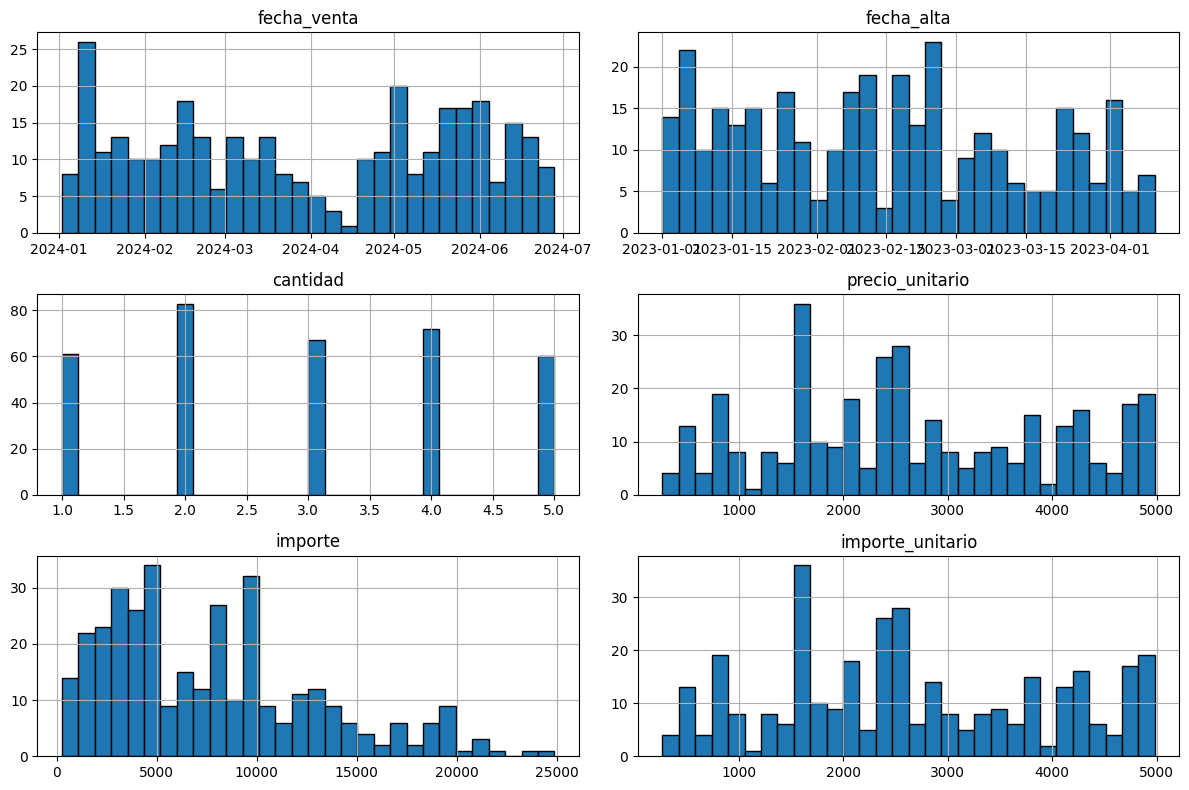

In [23]:
#Distribuciones
df_aurelion.hist(bins=30, figsize=(12, 8),edgecolor='black')
plt.tight_layout()
plt.show()

#### 3.5.3 Correlaciones

In [12]:
#Correlaciones
#matriz de correlación
numeric=df_aurelion.select_dtypes(include=['int64', 'float64'])
numeric.corr()

,cantidad,precio_unitario,importe
cantidad,1.000000,-0.074483,0.599723
precio_unitario,-0.074483,1.000000,0.679298
importe,0.599723,0.679298,1.000000


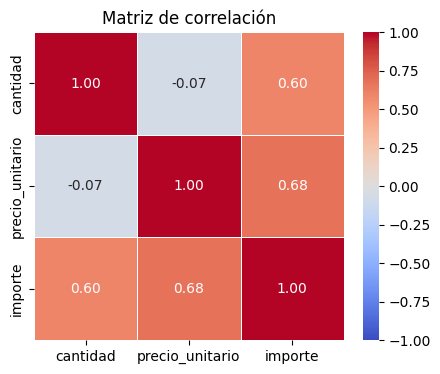

In [13]:
#Matriz de correlación visualizada (heatmap)
plt.figure(figsize=(5,4))
sns.heatmap(numeric.corr(), annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, linewidths=.5)
plt.title("Matriz de correlación")
plt.show()

#### 3.5.4 Valores atípicos

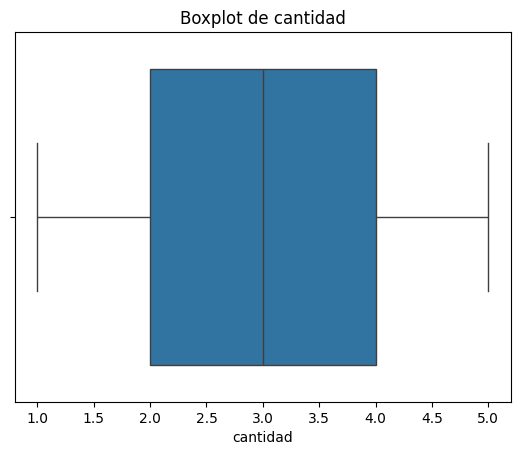

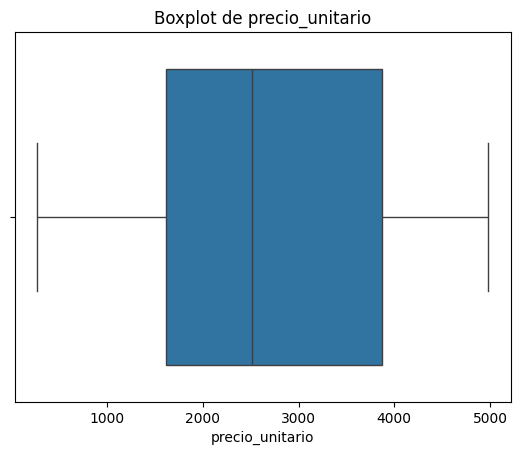

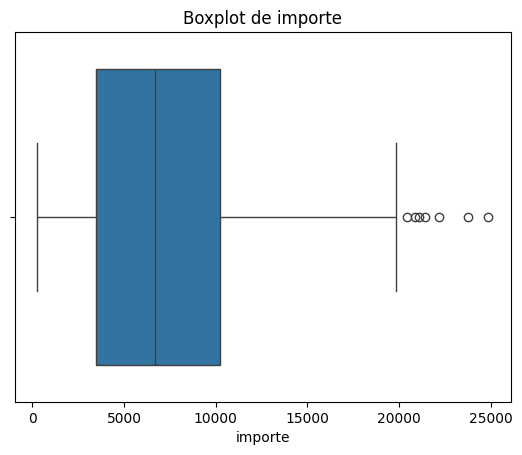

In [14]:
#Valores atípicos (boxplots)
for col in numeric.columns:
    plt.figure()
    sns.boxplot(x=numeric[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

<p>De lo boxplots podemos notar valores atípicos en la variable de importe, los valores atípicos pueden sesgar análisis estadísticos y afectar la precisión de modelos
</p>

In [15]:
# Cuartiles de importe
importe_Q1 = df_aurelion['importe'].quantile(0.25)
importe_Q2 = df_aurelion['importe'].quantile(0.50)
importe_Q3 = df_aurelion['importe'].quantile(0.75)
importe_IQR = importe_Q3 - importe_Q1
importe_limite_superior = importe_Q3 + 1.5 * importe_IQR

print(f"Importe Q1: {importe_Q1}")
print(f"Importe Q2 (Mediana): {importe_Q2}")
print(f"Importe Q3: {importe_Q3}")
print(f"Importe IQR: {importe_IQR}")
print(f"Importe Límite Superior: {importe_limite_superior}")

Importe Q1: 3489.0
Importe Q2 (Mediana): 6702.0
Importe Q3: 10231.5
Importe IQR: 6742.5
Importe Límite Superior: 20345.25


In [16]:
# Identificación de outliers
outliers = df_aurelion['importe'] > importe_limite_superior
aurelion_outliers = df_aurelion[outliers]
aurelion_outliers.shape


(7, 11)

<p> de los 343 registros que tenemos 7 son aquellos outliers visualizados en el boxplot</p>

In [17]:
aurelion_outliers[['nombre_cliente', 'importe', 'fecha_venta']]

,nombre_cliente,importe,fecha_venta
41,Nicolas Rojas,22150,2024-04-12
54,Karina Acosta,21430,2024-06-19
141,Bruno Castro,23760,2024-01-09
175,Karina Castro,21090,2024-06-19
208,Guadalupe Martinez,24865,2024-05-23
260,Elena Rodriguez,20450,2024-03-06
308,Mariana Rodriguez,20850,2024-05-19


### 3.6 Analítica descriptiva del negocio

En esta sección se recopila misceláneo de visualizaciones de los datos de la tienda Aurelion que puedan brindar hallazgos de interés para el negocio

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_3488\3402097468.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cantidad', y='producto_comprado', data=ventas_por_producto.head(15), palette='viridis')


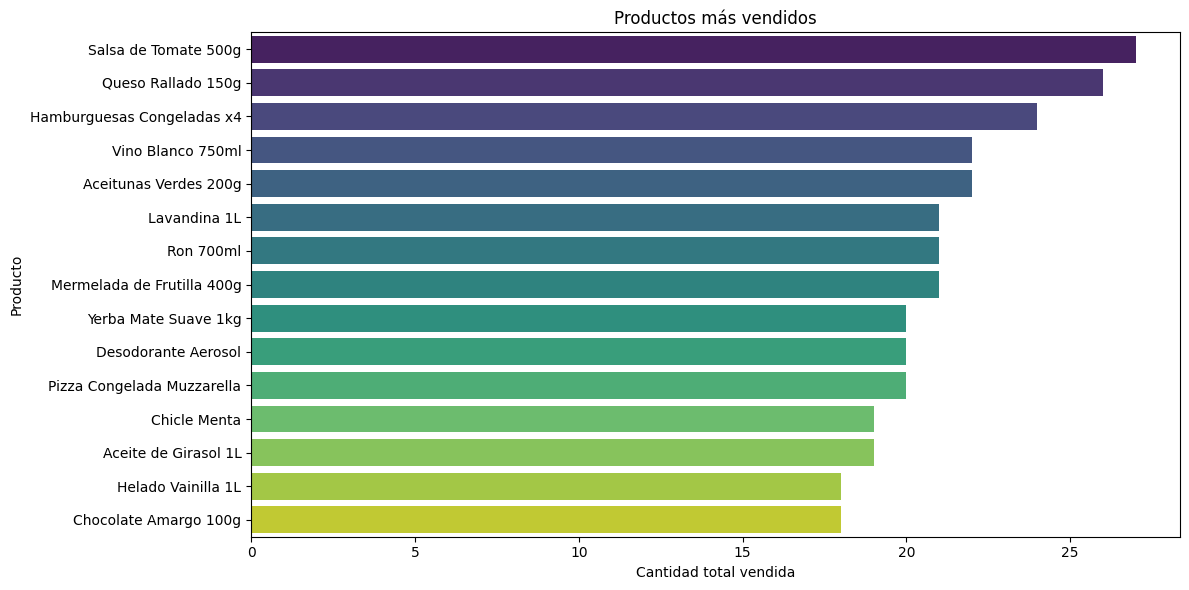

In [ ]:
# Top 15 productos más vendidos
ventas_por_producto = df_aurelion.groupby('producto_comprado')['cantidad'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x='cantidad', y='producto_comprado', data=ventas_por_producto.head(15), palette='viridis')
plt.title('Productos más vendidos')
plt.xlabel('Cantidad total vendida')
plt.ylabel('Producto')
plt.tight_layout()
plt.show()

Productos con menor rotación:
           producto_comprado  cantidad
85               Vodka 700ml         4
86              Manteca 200g         4
87       Porotos Negros 500g         3
88            Miel Pura 250g         3
89        Yogur Natural 200g         3
90          Maní Salado 200g         3
91  Detergente Líquido 750ml         2
92  Chocolate con Leche 100g         2
93            Alfajor Triple         2
94       Galletitas Vainilla         2


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_3488\2541629586.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cantidad', y='producto_comprado', data=productos_menos_vendidos, palette='rocket')


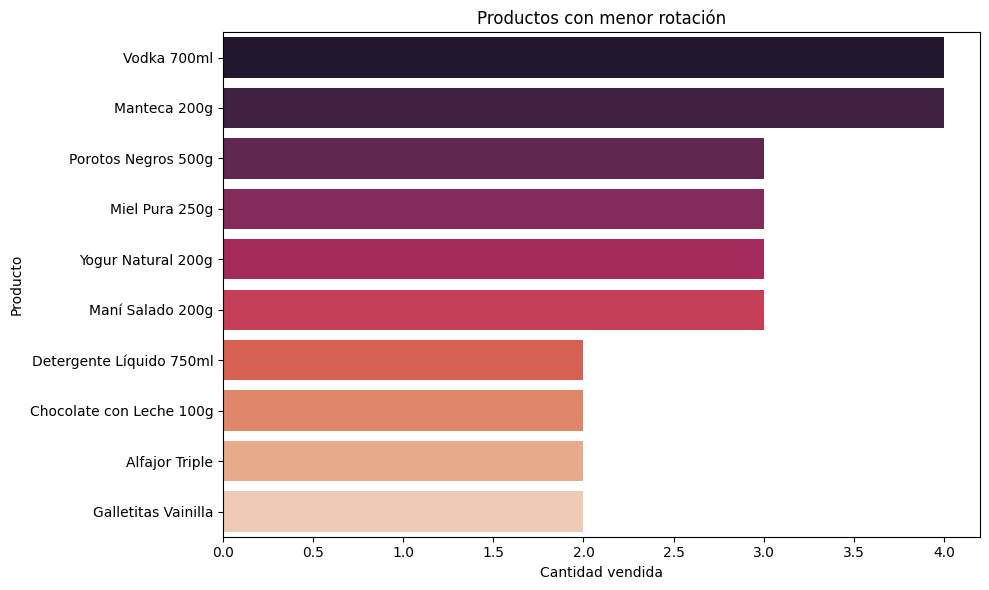

In [33]:
productos_menos_vendidos = ventas_por_producto.tail(10)
print("Productos con menor rotación:")
print(productos_menos_vendidos)

plt.figure(figsize=(10,6))
sns.barplot(x='cantidad', y='producto_comprado', data=productos_menos_vendidos, palette='rocket')
plt.title('Productos con menor rotación')
plt.xlabel('Cantidad vendida')
plt.ylabel('Producto')
plt.tight_layout()
plt.show()

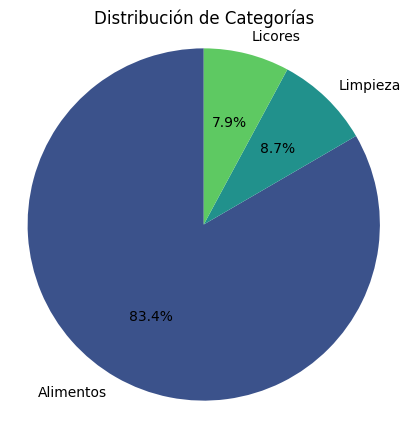

In [27]:
# Extracción y conteo por categoría
counts = df_aurelion['categoria'].value_counts()
labels = counts.index

# Configuración de paletta (guía de paletas: 'viridis', 'magma', 'pastel', 'Set3', 'tab10')
palette = sns.color_palette('viridis', n_colors=len(counts))

# Impresión del gráfico usando la paleta
plt.figure(figsize=(5, 5))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=palette)
plt.axis('equal')
plt.title('Distribución de Categorías')
plt.show()

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_3488\1856185542.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importe', y='ciudad', data=ventas_ciudad, palette='crest')


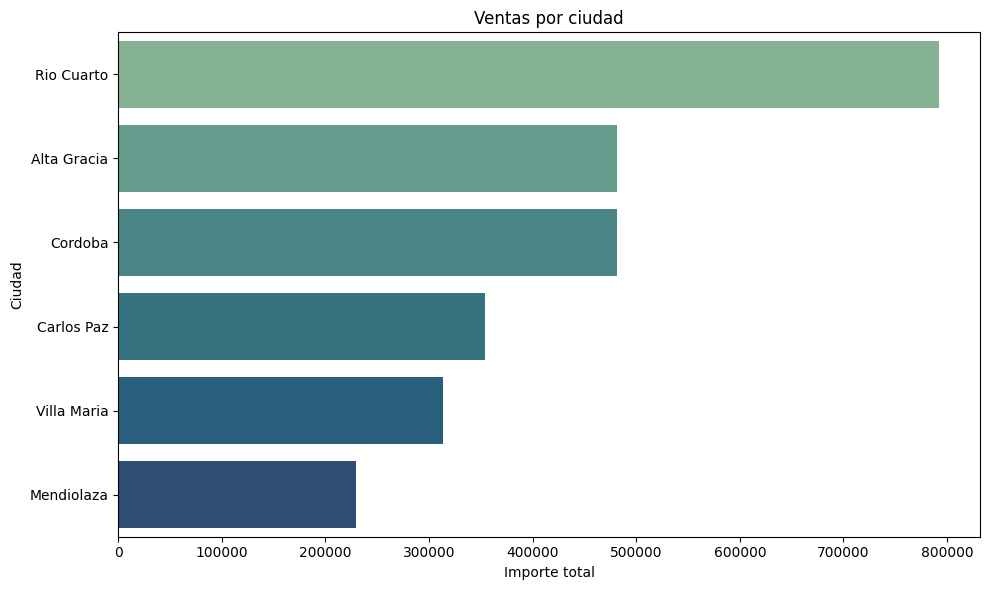

In [28]:
ventas_ciudad = df_aurelion.groupby('ciudad')['importe'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='importe', y='ciudad', data=ventas_ciudad, palette='crest')
plt.title('Ventas por ciudad')
plt.xlabel('Importe total')
plt.ylabel('Ciudad')
plt.tight_layout()
plt.show()

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_3488\34087445.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importe', y='mes', data=ventas_mes, palette='viridis')


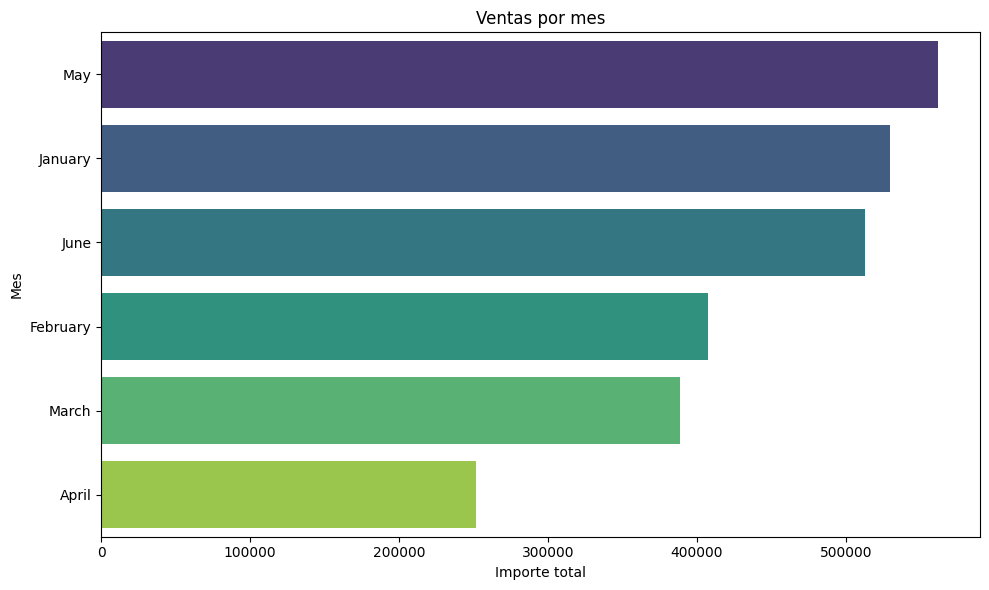

In [31]:
df_aurelion['mes'] = df_aurelion['fecha_venta'].dt.month_name()

ventas_mes = df_aurelion.groupby('mes')['importe'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='importe', y='mes', data=ventas_mes, palette='viridis')
plt.title('Ventas por mes')
plt.xlabel('Importe total')
plt.ylabel('Mes')
plt.tight_layout()
plt.show()

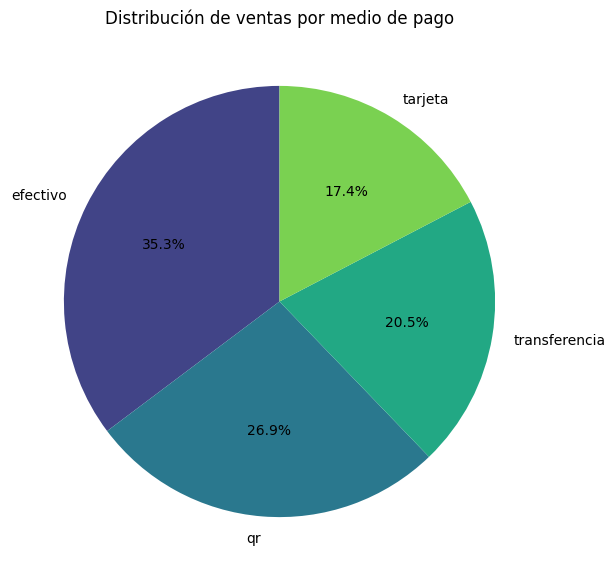

In [32]:
ventas_medio_pago = df_aurelion.groupby('medio_pago')['importe'].sum().sort_values(ascending=False).reset_index()

# Configuración de paletta (guía de paletas: 'viridis', 'magma', 'pastel', 'Set3', 'tab10')
palette = sns.color_palette('viridis', n_colors=len(ventas_medio_pago))

plt.figure(figsize=(7,7))
plt.pie(ventas_medio_pago['importe'], labels=ventas_medio_pago['medio_pago'], autopct='%1.1f%%', startangle=90, colors=palette)
plt.title('Distribución de ventas por medio de pago')
plt.show()